In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:

House=pd.read_csv("House.csv")
House


,Area,balcony,bath,price
0,1056,1.0,2,39.07
1,2600,3.0,5,120.00
2,1440,3.0,2,62.00
3,1521,1.0,3,95.00
4,1200,1.0,2,51.00
5,1170,1.0,2,38.00
6,2732,NaN,4,204.00
7,3300,NaN,4,600.00
8,1310,1.0,3,63.25
9,1020,NaN,6,370.00


In [99]:
House.isna()

,Area,balcony,bath,price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,False,True,False,False
8,False,False,False,False
9,False,True,False,False


In [100]:
House.isna().sum()

Area       0
balcony    3
bath       0
price      0
dtype: int64

In [101]:
House.isna().sum().sum()

3

In [102]:
House.describe()

,Area,balcony,bath,price
count,15.000000,12.000000,15.000000,15.000000
mean,1752.266667,1.750000,3.133333,148.888000
std,774.299173,0.866025,1.355764,160.293365
min,1000.000000,1.000000,2.000000,38.000000
25%,1135.000000,1.000000,2.000000,45.500000
50%,1440.000000,1.500000,3.000000,70.000000
75%,2425.000000,2.250000,4.000000,176.000000
max,3300.000000,3.000000,6.000000,600.000000


In [103]:
df1=House.fillna(method='bfill',axis=1)

In [104]:
df1

,Area,balcony,bath,price
0,1056.0,1.0,2.0,39.07
1,2600.0,3.0,5.0,120.00
2,1440.0,3.0,2.0,62.00
3,1521.0,1.0,3.0,95.00
4,1200.0,1.0,2.0,51.00
5,1170.0,1.0,2.0,38.00
6,2732.0,4.0,4.0,204.00
7,3300.0,4.0,4.0,600.00
8,1310.0,1.0,3.0,63.25
9,1020.0,6.0,6.0,370.00


# outliers detecting and removal

In [105]:
q1=df1['Area'].quantile(0.25)
q3=df1['Area'].quantile(0.75)
iqr=q3-q1

In [106]:
q1,q3,iqr

(1135.0, 2425.0, 1290.0)

In [107]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(4360.0, -800.0)

In [108]:
df1.loc[(df1['Area'] > upper_limit) | (df1['Area'] < lower_limit)]

,Area,balcony,bath,price


# Visualization

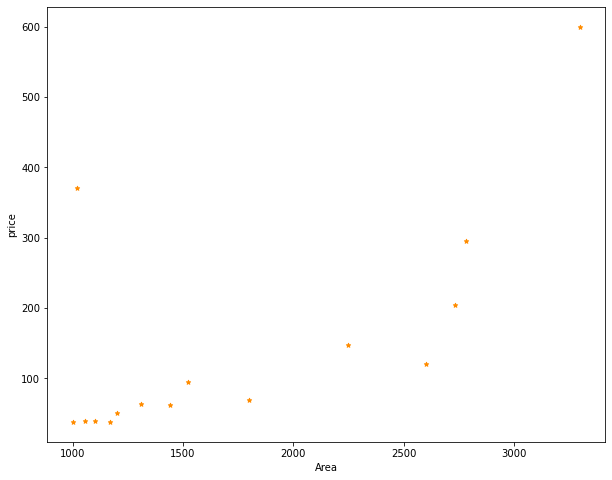

In [109]:
ax=df1.plot('Area','price',kind='scatter',color='darkorange',marker='*',figsize=(10,8))

<AxesSubplot:ylabel='Frequency'>

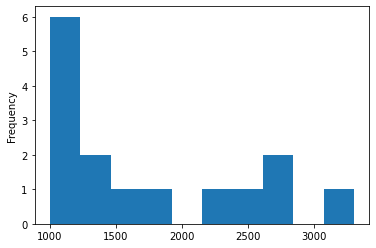

In [110]:
df1['Area'].plot(kind='hist')

<AxesSubplot:>

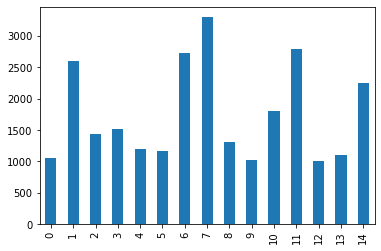

In [111]:
df1['Area'].plot(kind='bar')

<AxesSubplot:ylabel='Area'>

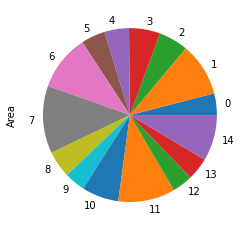

In [112]:
df1['Area'].plot(kind='pie')

In [113]:
x=df1[['Area','balcony','bath']]
y=df1['price']

In [114]:
y

0      39.07
1     120.00
2      62.00
3      95.00
4      51.00
5      38.00
6     204.00
7     600.00
8      63.25
9     370.00
10     70.00
11    295.00
12     38.00
13     40.00
14    148.00
Name: price, dtype: float64

In [115]:
x

,Area,balcony,bath
0,1056.0,1.0,2.0
1,2600.0,3.0,5.0
2,1440.0,3.0,2.0
3,1521.0,1.0,3.0
4,1200.0,1.0,2.0
5,1170.0,1.0,2.0
6,2732.0,4.0,4.0
7,3300.0,4.0,4.0
8,1310.0,1.0,3.0
9,1020.0,6.0,6.0


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [118]:
len(x_train)

12

In [119]:
len(x_test)

3

In [120]:
x_train

,Area,balcony,bath
6,2732.0,4.0,4.0
8,1310.0,1.0,3.0
2,1440.0,3.0,2.0
10,1800.0,2.0,2.0
5,1170.0,1.0,2.0
11,2785.0,3.0,5.0
14,2250.0,2.0,3.0
1,2600.0,3.0,5.0
0,1056.0,1.0,2.0
4,1200.0,1.0,2.0


In [121]:
y_test

3      95.0
7     600.0
12     38.0
Name: price, dtype: float64

In [122]:
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression()

In [123]:
clf.fit(x_train,y_train)


LinearRegression()

In [124]:
clf.predict(x_test)

array([ 78.34558575, 207.48499547,  33.04538687])

In [125]:
clf.predict([[1440,3.0,2]])

array([88.56918685])

In [126]:
clf.score(x_test,y_test)

0.19335425914408033